In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
Consumption_of_various_sources_INDIA = pd.read_csv('../input/energy-profile-india-and-world/Consumption of various sources-INDIA.csv')
Electricity_Generation_INDIA = pd.read_csv('../input/energy-profile-india-and-world/Electricity Generation-INDIA.csv')
Other_data_INDIA = pd.read_csv('../input/energy-profile-india-and-world/Other data-INDIA.csv')
World_Per_capita_electricity_consumption = pd.read_csv('../input/energy-profile-india-and-world/World Per capita electricity consumption.csv')
percent_of_electricity_from_different_sourse_INDIA = pd.read_csv('../input/energy-profile-india-and-world/percent of electricity from different sourse-INDIA.csv')

In [3]:
Consumption_of_various_sources_INDIA.head()

Unnamed: 0  Year Entity Code  Oil Consumption - EJ  Gas Consumption - EJ  \
0           0  1965  India  IND            146.995250              2.372522   
1           1  1966  India  IND            164.149813              2.663272   
2           2  1967  India  IND            169.360364              3.558783   
3           3  1968  India  IND            189.771047              3.954203   
4           4  1969  India  IND            227.929016              4.745044   

   Coal Consumption - EJ  Solar Consumption - EJ  Hydro Consumption - EJ  \
0             413.407682                     0.0               53.241536   
1             412.415691                     0.0               55.598552   
2             419.285587                     0.0               62.215381   
3             433.825064                     0.0               71.803031   
4             460.841576                     0.0               79.721129   

   Nuclear Consumption - EJ  Wind Consumption - EJ  Geo Biomass Other - EJ  \
0                  0.000000                    0.0                     0.0   
1                  0.000000                    0.0                     0.0   
2                  0.000000                    0.0                     0.0   
3                  0.000000                    0.0                     0.0   
4                  2.013284                    0.0                     0.0   

   Biofuels (TWh)  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

In [4]:
Electricity_Generation_INDIA.tail()

Unnamed: 0  Year  Electricity Generation (TWh)  \
50          50  2015                    1139.55115   
51          51  2016                    1224.12637   
52          52  2017                    1285.73889   
53          53  2018                    1367.83152   
54          54  2019                    1378.17434   

    Electricity from coal (TWh)  Electricity from gas (TWh)  \
50                    871.91396                    40.51492   
51                    936.23271                    50.21168   
52                    972.93876                    50.25604   
53                   1024.70616                    50.25735   
54                    998.53834                    47.98038   

    Electricity from hydro (TWh)  Electricity from other renewables (TWh)  \
50                     132.26015                                 17.01867   
51                     128.61065                                 15.86316   
52                     135.86457                                 13.81864   
53                     141.33102                                 16.56163   
54                     161.74087                                 15.06263   

    Electricity from solar (TWh)  Electricity from oil (TWh)  \
50                       6.56638                     0.38256   
51                      11.55632                     0.31532   
52                      21.54458                     0.24859   
53                      36.33096                     0.21324   
54                      46.27278                     0.10795   

    Electricity from wind (TWh)  Electricity from nuclear (TWh)  \
50                     32.74138                        38.15313   
51                     43.45271                        37.88382   
52                     52.62931                        38.43840   
53                     60.31116                        38.12000   
54                     63.30850                        45.16289   

    Energy consumption per GDP (kWh per $)  Fossil fuels (% sub energy)  \
50                                   1.130                       92.492   
51                                   1.105                       92.567   
52                                     NaN                       92.161   
53                                     NaN                       91.885   
54                                     NaN                       91.037   

    Low-carbon energy (% sub energy)  Nuclear (% sub energy)  
50                             7.508                   1.213  
51                             7.433                   1.141  
52                             7.839                   1.075  
53                             8.115                   1.049  
54                             8.963                   1.182

In [5]:
Other_data_INDIA.head()

Unnamed: 0  Year  \
0           0  1965   
1           1  1966   
2           2  1967   
3           3  1968   
4           4  1969   

   Access to clean fuels and technologies for cooking  (% of population)  \
0                                                NaN                       
1                                                NaN                       
2                                                NaN                       
3                                                NaN                       
4                                                NaN                       

   Annual change primary energy consumption (%)  \
0                                           NaN   
1                                         3.054   
2                                         3.086   
3                                         6.866   
4                                        10.852   

   Annual CO2 emissions per unit energy (kg per kilowatt-hour)  \
0                                             0.2498             
1                                             0.2513             
2                                             0.2441             
3                                             0.2492             
4                                             0.2291             

   Per capita electricity (kWh)  Energy consumption per capita (kWh)  \
0                           NaN                             1234.199   
1                           NaN                             1245.658   
2                           NaN                             1257.530   
3                           NaN                             1315.776   
4                           NaN                             1427.496   

   Primary energy consumption (TWh)  Access to electricity (% of population)  
0                           616.017                                      NaN  
1                           634.827                                      NaN  
2                           654.420                                      NaN  
3                           699.353                                      NaN  
4                           775.250                                      NaN

In [6]:
World_Per_capita_electricity_consumption.head()

Entity  Year  Per capita electricity (kWh)
0  Afghanistan  2000                        22.474
1  Afghanistan  2001                        27.399
2  Afghanistan  2002                        30.397
3  Afghanistan  2003                        39.652
4  Afghanistan  2004                        36.155

In [7]:
percent_of_electricity_from_different_sourse_INDIA.tail()

Unnamed: 0  Year  Coal (% electricity)  Gas (% electricity)  \
50          50  2015             76.513806             3.555340   
51          51  2016             76.481704             4.101838   
52          52  2017             75.671567             3.908728   
53          53  2018             74.914647             3.674235   
54          54  2019             72.453703             3.481445   

    Hydro (% electricity)  Solar (% electricity)  Wind (% electricity)  \
50              11.606337               0.576225              2.873182   
51              10.506321               0.944046              3.549692   
52              10.567042               1.675657              4.093312   
53              10.332487               2.656099              4.409254   
54              11.735879               3.357542              4.593650   

    Oil (% electricity)  Nuclear (% electricity)  \
50             0.033571                 3.348084   
51             0.025759                 3.094764   
52             0.019334                 2.989596   
53             0.015590                 2.786893   
54             0.007833                 3.277008   

    Other renewables (% electricity)  Fossil fuels (% electricity)  \
50                          1.493454                     80.102718   
51                          1.295876                     80.609301   
52                          1.074763                     79.599629   
53                          1.210795                     78.604472   
54                          1.092941                     75.942980   

    Low-carbon electricity (% electricity)  Nuclear (% electricity).1  \
50                               19.897282                   3.348084   
51                               19.390699                   3.094764   
52                               20.400371                   2.989596   
53                               21.395528                   2.786893   
54                               24.057020                   3.277008   

    Renewables (% electricity)  
50                   16.549198  
51                   16.295935  
52                   17.410775  
53                   18.608635  
54                   20.780011

<h1><b>2 <span style='color:#035afc;'>|</span> Per capita electricity consumption-WORLD</b></h1>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#2b2b2b;font-size:120%;
            font-family:fantasy;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.1 | About the data</b></p>
</div>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It means the average amount of electric current used by a person for a year. Average power per capita was calculated according to the formula: <br>
    <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>Electric energy per capita [ in watt-hour ] = Total population electricity consumption [ in kW·h/yr ] * 1,000 /population.</b></mark> This dataset covers mostly all country in the world. The datas mostly from the year 1985 to 2019 and some from 2000 to 2019. Please check the graph for the year.
            </p>

In [8]:
World_Per_capita_electricity_consumption.head()

Entity  Year  Per capita electricity (kWh)
0  Afghanistan  2000                        22.474
1  Afghanistan  2001                        27.399
2  Afghanistan  2002                        30.397
3  Afghanistan  2003                        39.652
4  Afghanistan  2004                        36.155

In [9]:
print("The shape of the data ",World_Per_capita_electricity_consumption.shape)
World_Per_capita_electricity_consumption.info()

The shape of the data  (5620, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5620 entries, 0 to 5619
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        5620 non-null   object 
 1   Year                          5620 non-null   int64  
 2   Per capita electricity (kWh)  5620 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 131.8+ KB


<div style="color:white;display:fill;border-radius:8px;
            background-color:#2b2b2b;font-size:120%;
            font-family:fantasy;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.2 | Searching for missing values and handling it</b></p>
</div>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Real-world data would certainly have missing values. This could be due to many reasons such as data entry errors or data collection problems. Irrespective of the reasons, it is important to handle missing data because any statistical results based on a dataset with non-random missing values could be biased.</p>


In [10]:
World_Per_capita_electricity_consumption.isna().sum()

Entity                          0
Year                            0
Per capita electricity (kWh)    0
dtype: int64

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2b2b2b;font-size:120%;
            font-family:fantasy;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.3 | Exploratory Data Analysis</b></p>
</div>
<p>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>to discover patterns, and anomalies (outliers),</b></mark> and form hypotheses based on our understanding of the dataset. In this dataset we are going to plot the data points in <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>line plot.</b></mark> It will give more details about the data and also used to find the patterns.</p>
<ul><li>In graph <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>x-label</b></mark> : Year.</li>
<li>In graph <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>Y-label</b></mark> : Per capita electricity consumption in <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>kilowatt hour</b></mark> kWh.</li>
</ul>

In [11]:
len(World_Per_capita_electricity_consumption['Entity'].unique())

213

In [12]:
World_Per_capita_electricity_consumption['Entity'].unique()[0:50]

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia'], dtype=object)

In [13]:
a=[]
b=[]
c=[]
d=[]
e=[]
f=[]
g=[]
h=[]
i=[]
j=[]
first_50 = [a,b,c,d,e,f,g,h,i,j]
inc = 0
for i in World_Per_capita_electricity_consumption['Entity'].unique()[0:50]:
    if len(first_50[inc])<5:
        first_50[inc].append(i)
    else:
        inc = inc+1
        first_50[inc].append(i)

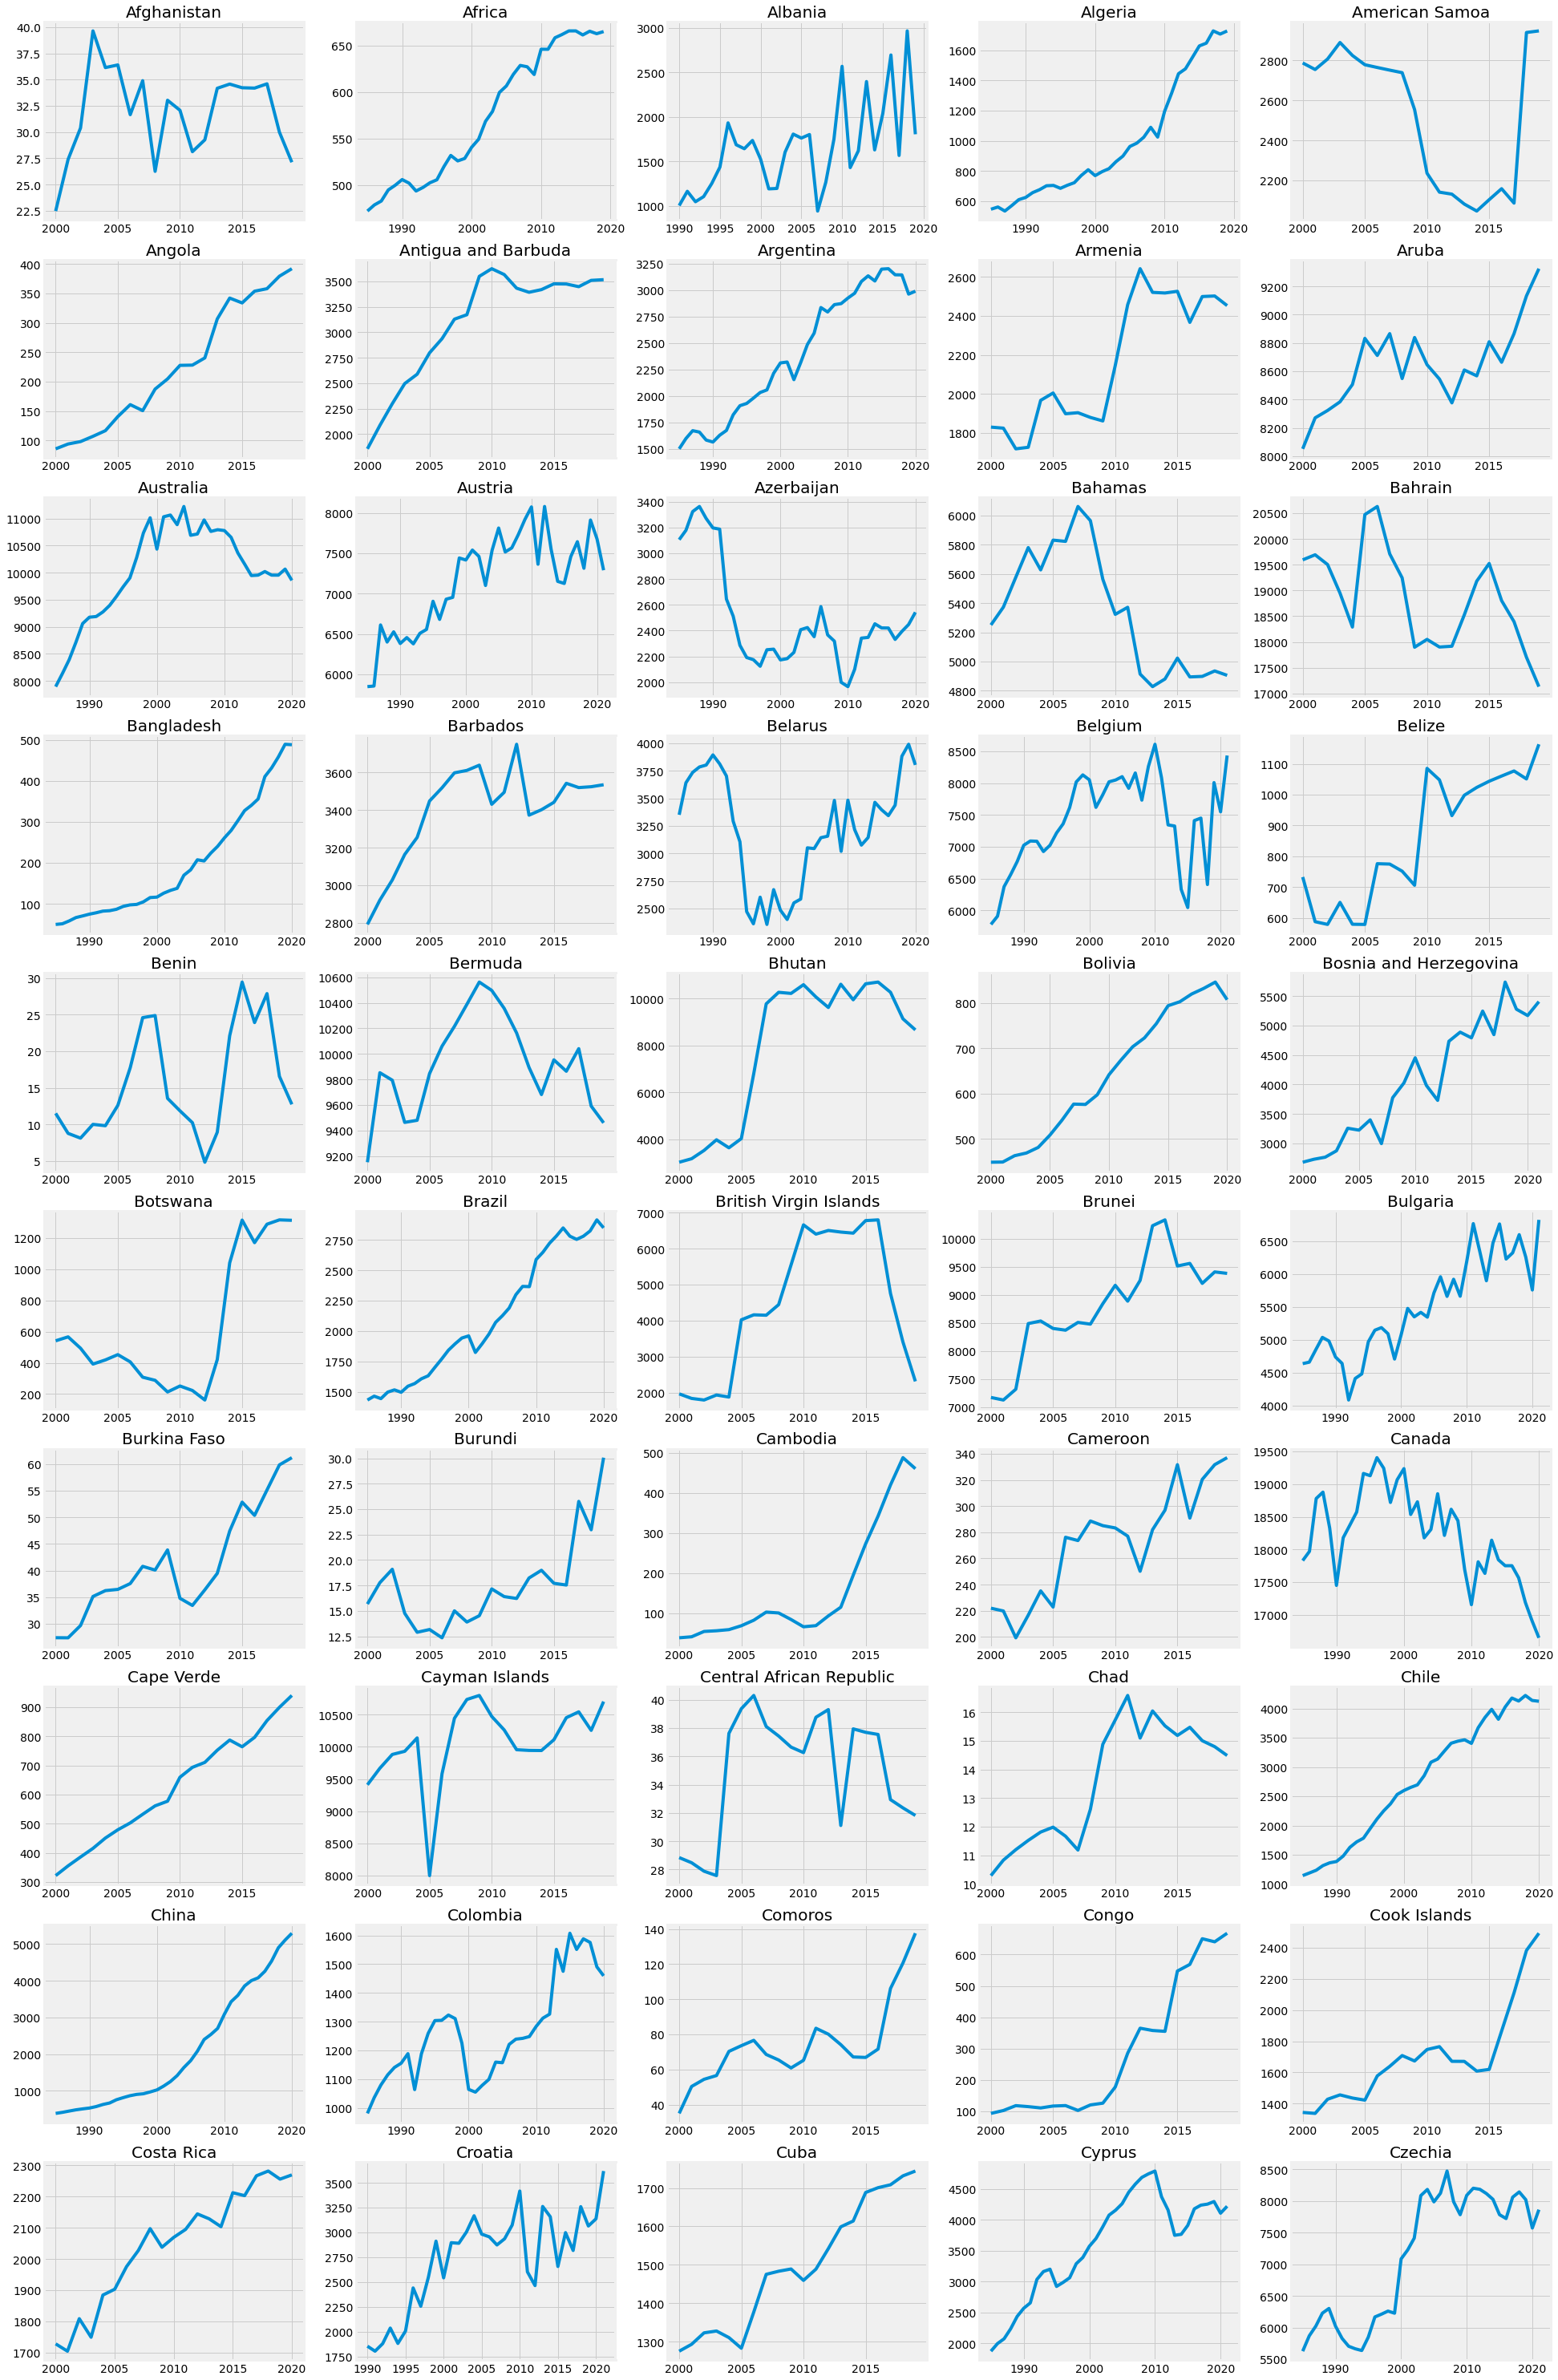

In [14]:
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(10,5,figsize=(30,50),facecolor='white')
for i in range(0,10):
    data = first_50[i]
    for j in range(0,5):
        ax[i,j].plot(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']==data[j]],World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']==data[j]])
        ax[i,j].set_title(data[j])

In [15]:
aa=[]
bb=[]
cc=[]
dd=[]
ee=[]
ff=[]
gg=[]
hh=[]
ii=[]
jj=[]
second_50 = [aa,bb,cc,dd,ee,ff,gg,hh,ii,jj]
inc = 0
for i in World_Per_capita_electricity_consumption['Entity'].unique()[50:100]:
    if len(second_50[inc])<5:
        second_50[inc].append(i)
    else:
        inc = inc+1
        second_50[inc].append(i)

In [16]:
World_Per_capita_electricity_consumption['Entity'].unique()[50:100]

array(['Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Europe',
       'European Union (27)', 'Falkland Islands', 'Fiji', 'Finland',
       'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland',
       'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan'],
      dtype=object)

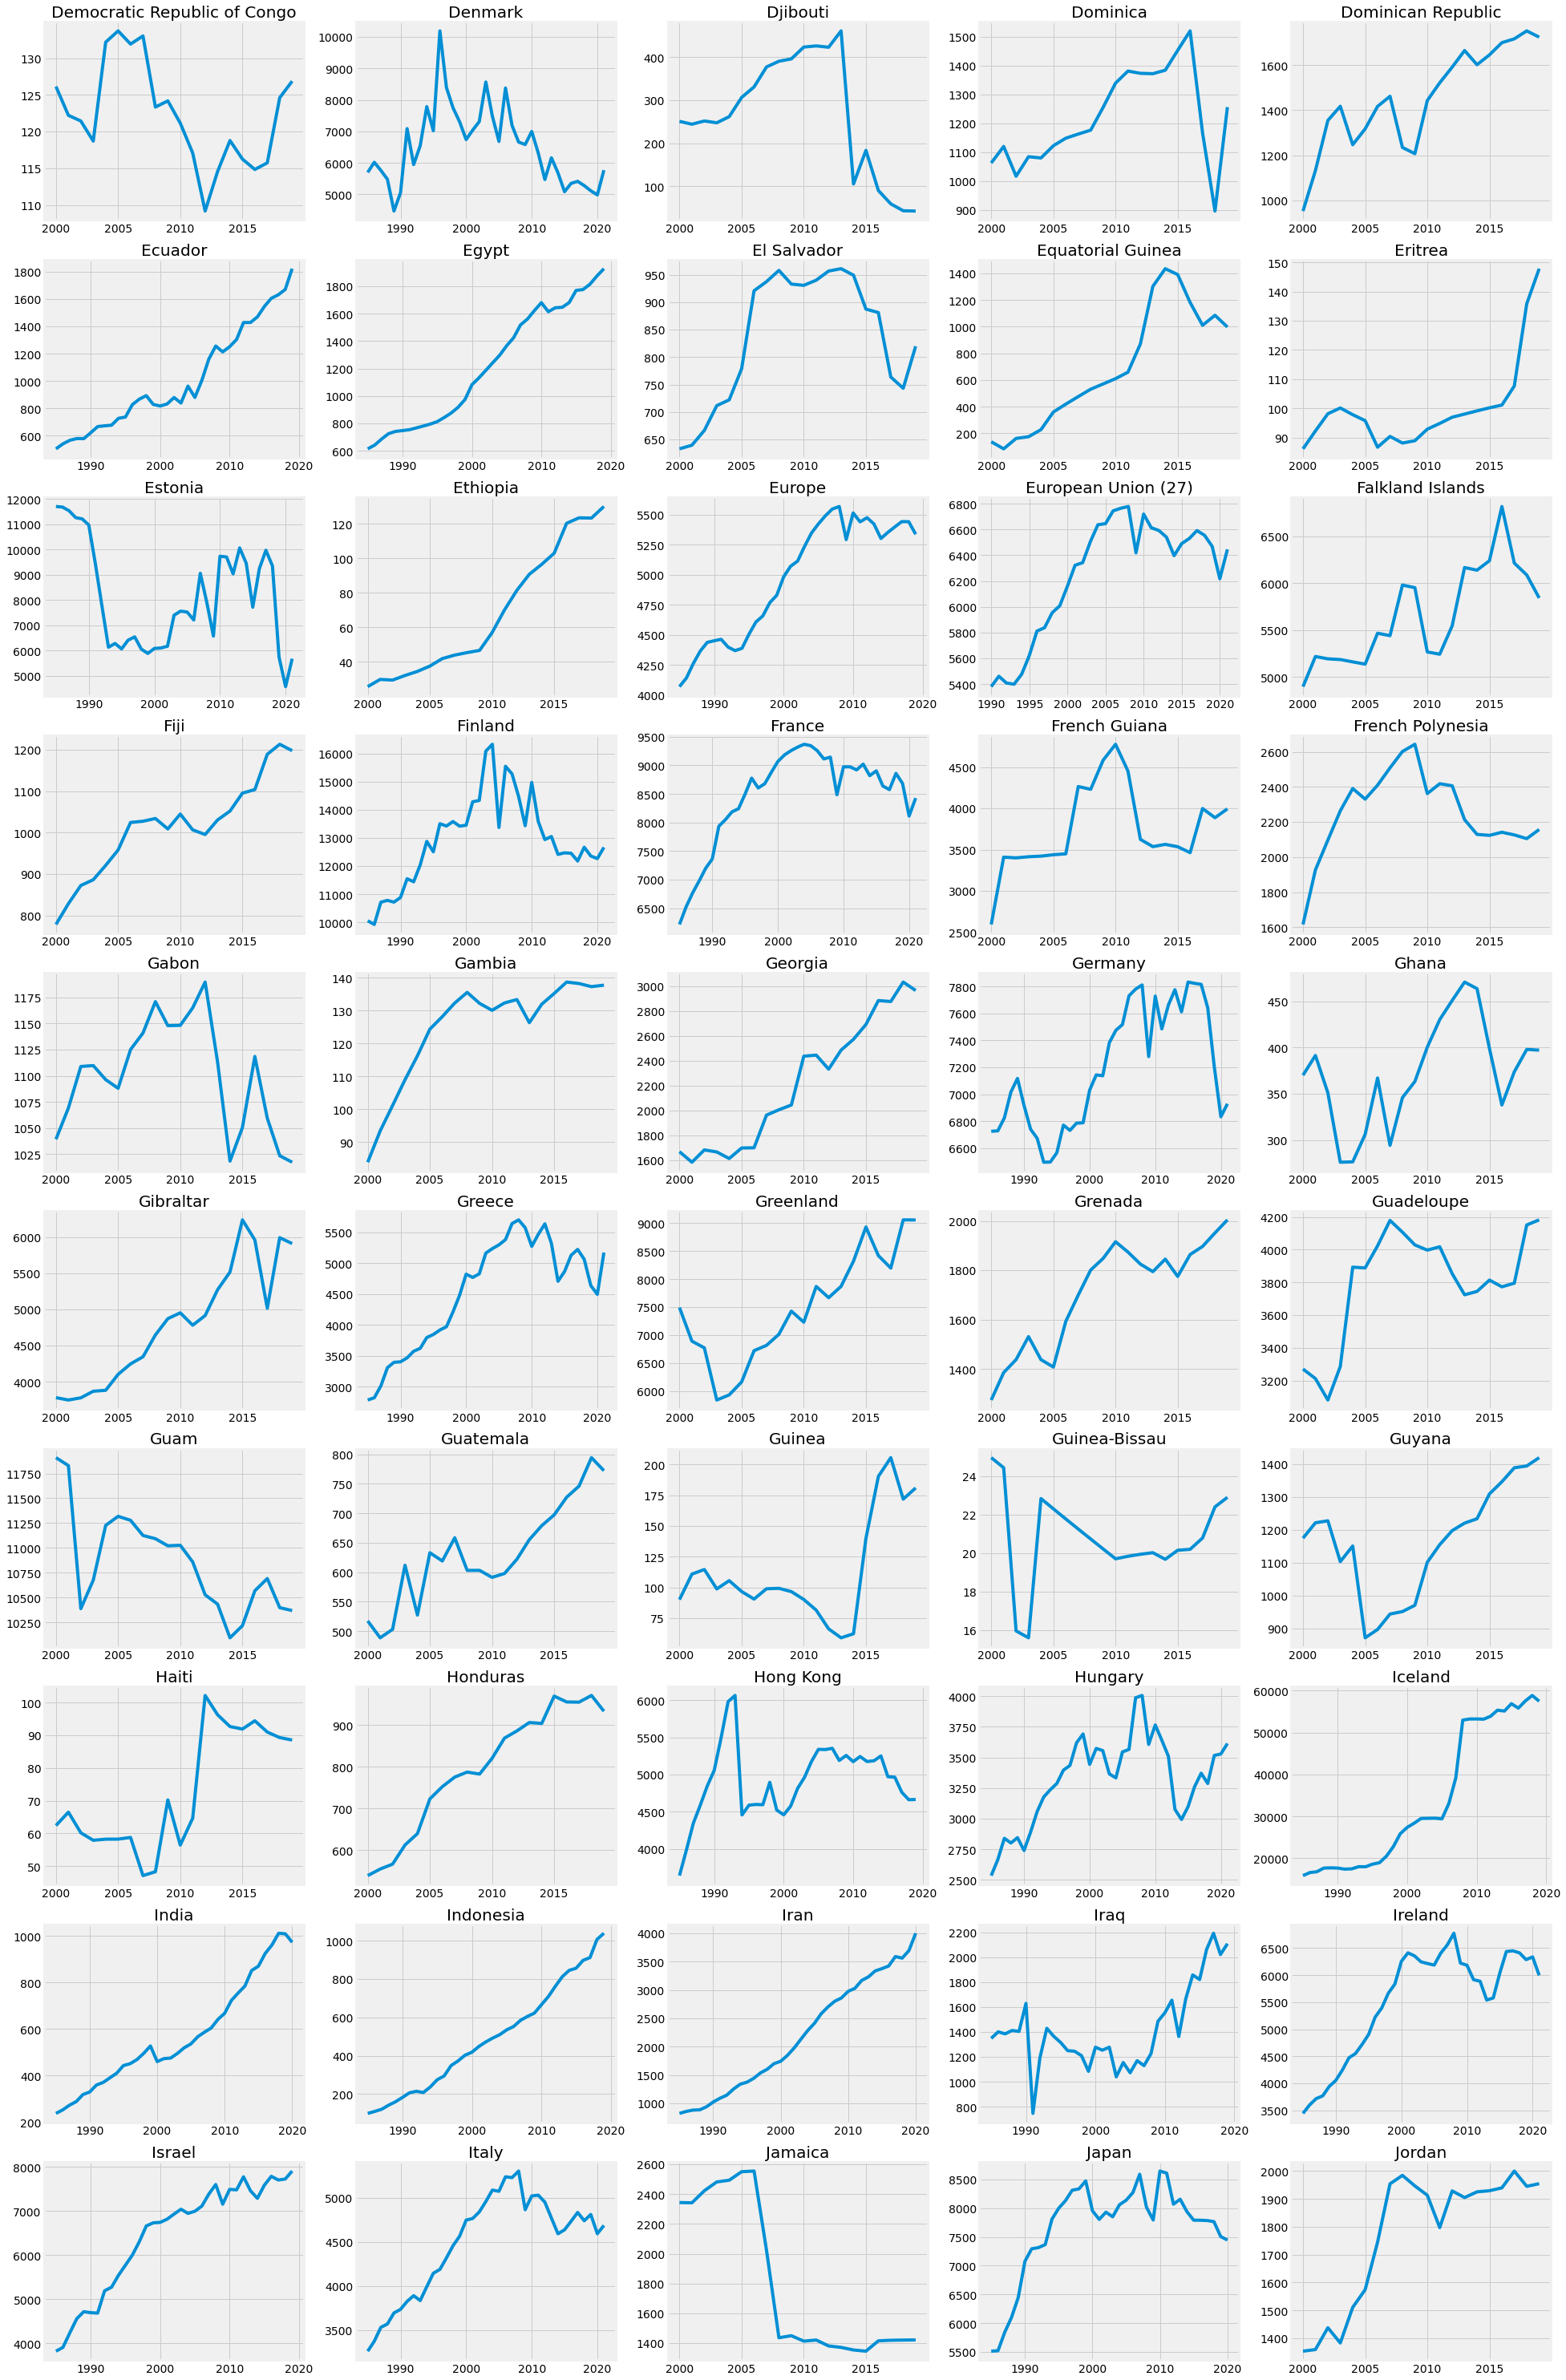

In [17]:
fig, ax= plt.subplots(10,5,figsize=(30,50),facecolor='white')
for i in range(0,10):
    data = second_50[i]
    for j in range(0,5):
        ax[i,j].plot(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']==data[j]],World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']==data[j]])
        ax[i,j].set_title(data[j])

In [18]:
aaa=[]
bbb=[]
ccc=[]
ddd=[]
eee=[]
fff=[]
ggg=[]
hhh=[]
iii=[]
jjj=[]
third_50 = [aaa,bbb,ccc,ddd,eee,fff,ggg,hhh,iii,jjj]
inc = 0
for i in World_Per_capita_electricity_consumption['Entity'].unique()[100:150]:
    if len(third_50[inc])<5:
        third_50[inc].append(i)
    else:
        inc = inc+1
        third_50[inc].append(i)

In [19]:
World_Per_capita_electricity_consumption['Entity'].unique()[100:150]

array(['Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
       'Mali', 'Malta', 'Martinique', 'Mauritania', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique',
       'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands',
       'Netherlands Antilles', 'New Caledonia', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'North Korea',
       'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palestine',
       'Panama', 'Papua New Guinea', 'Paraguay', 'Peru'], dtype=object)

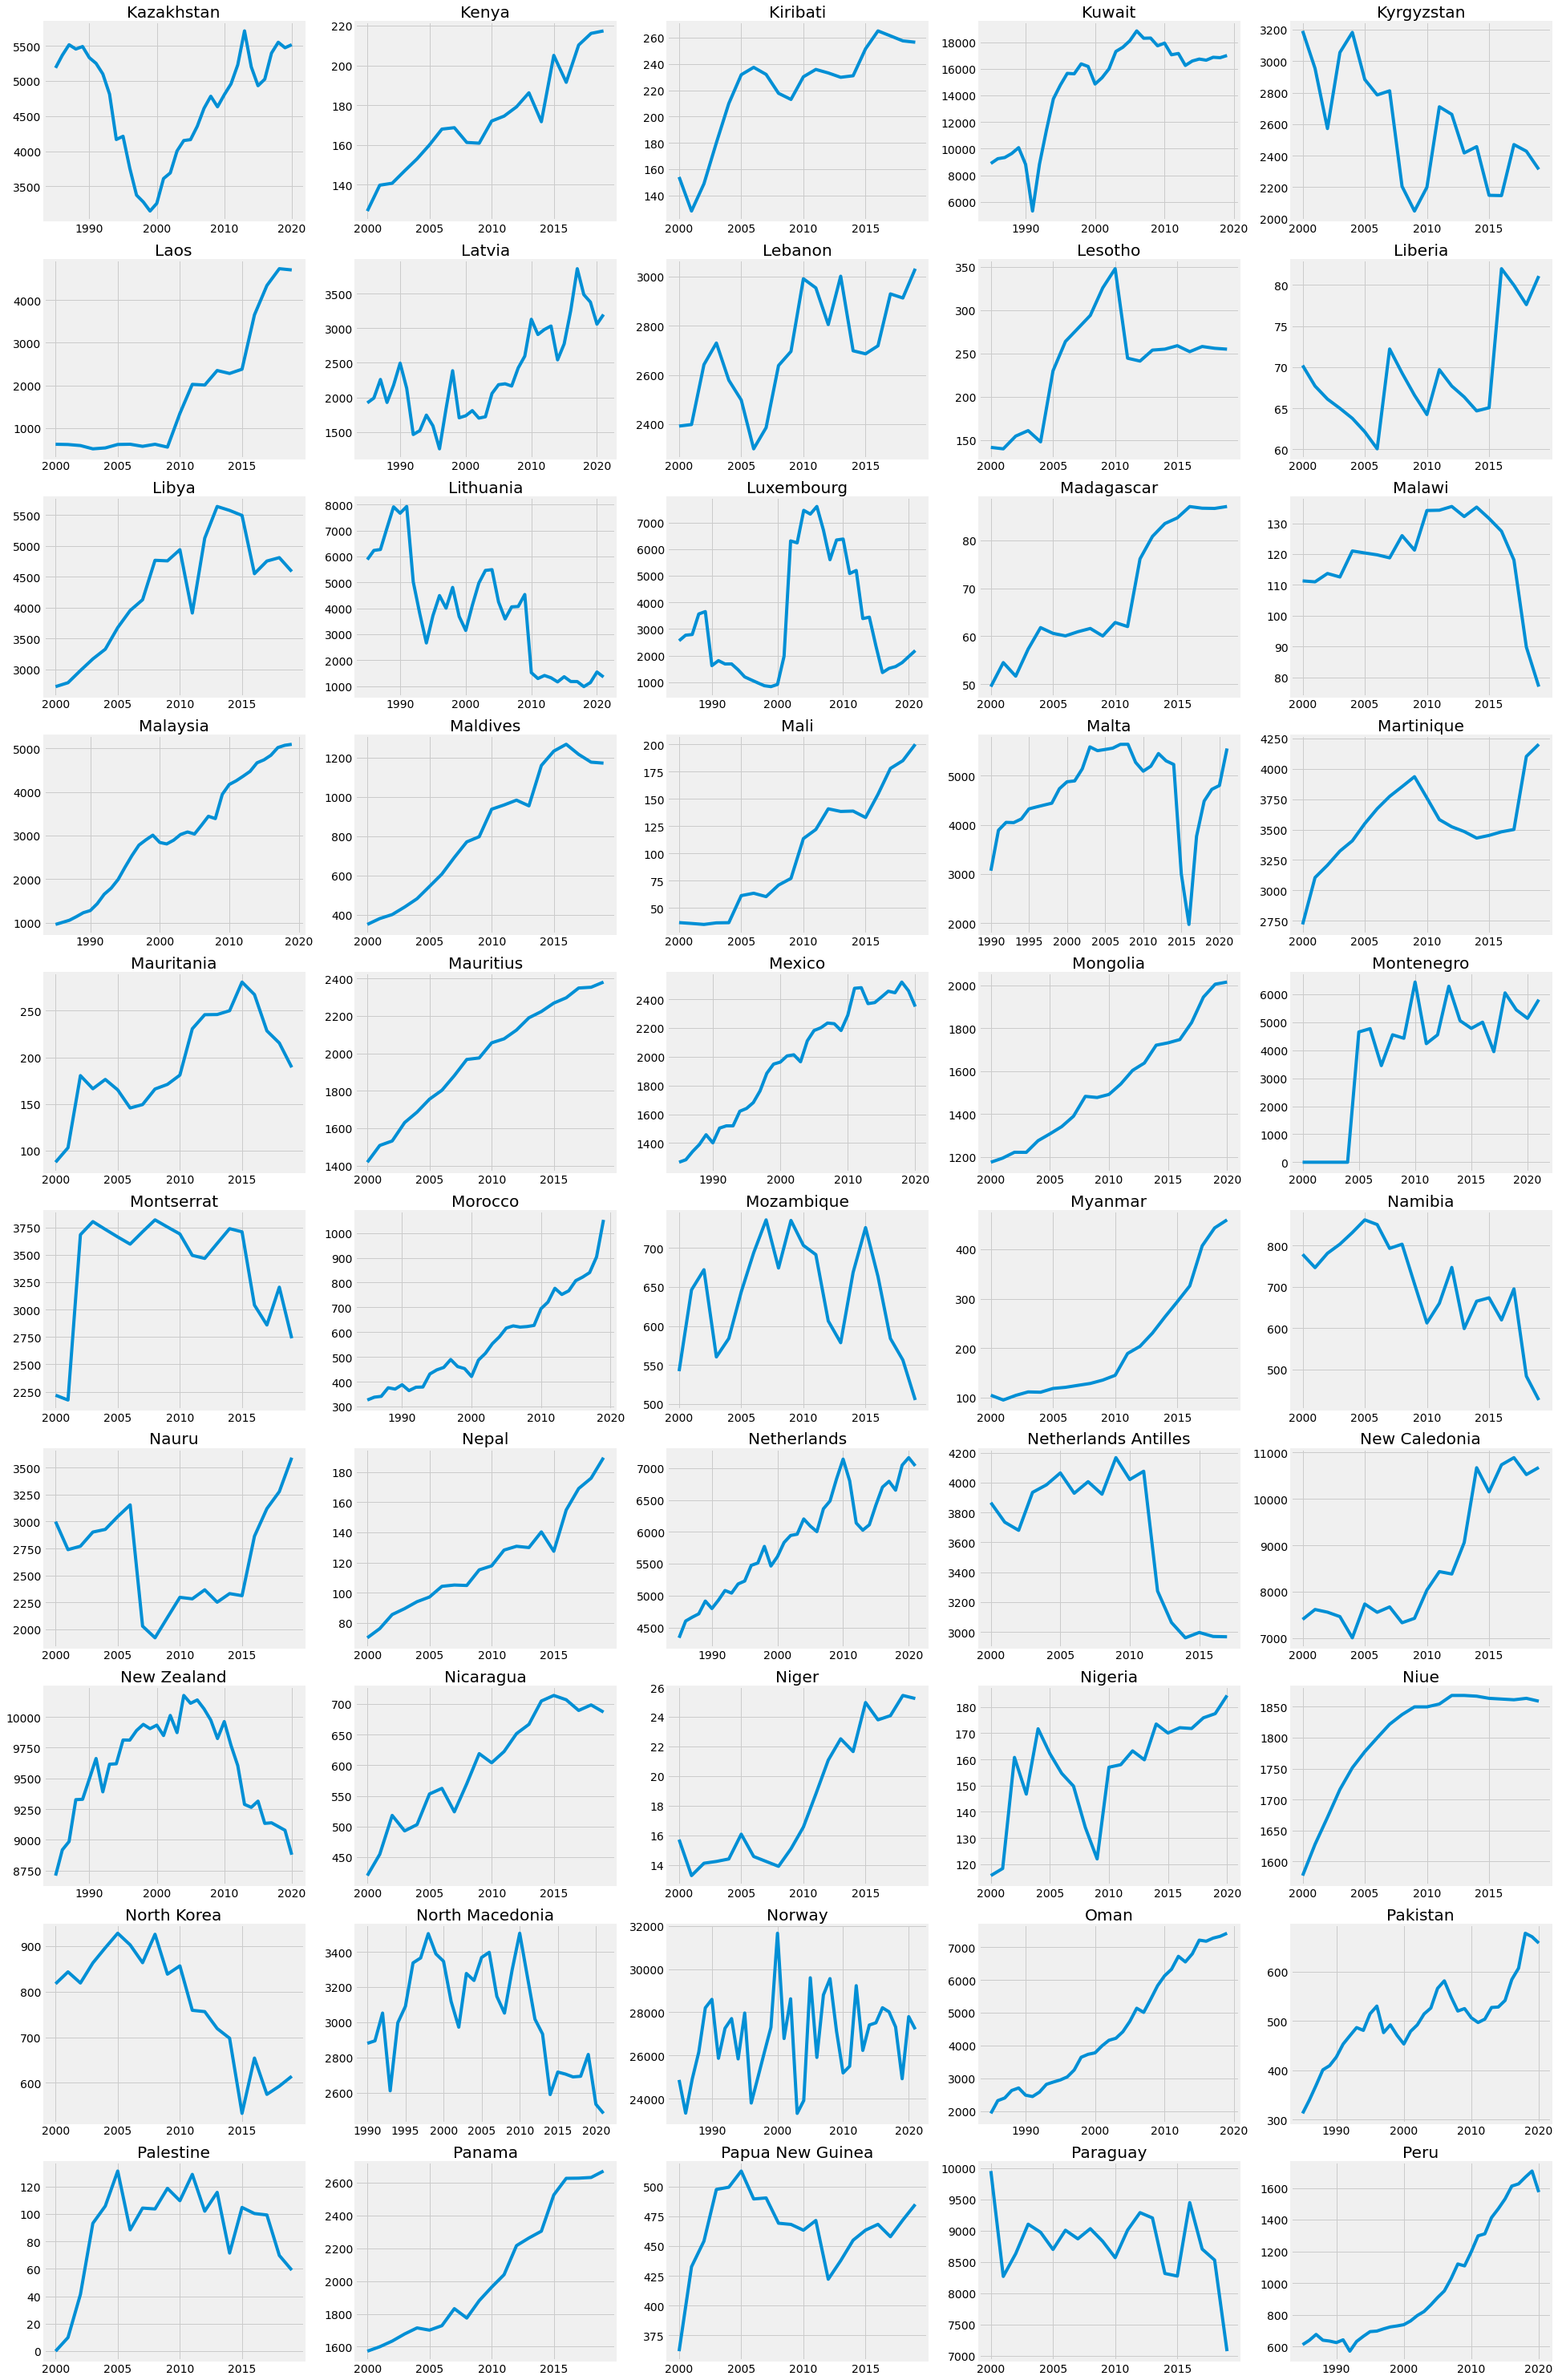

In [20]:
fig, ax= plt.subplots(10,5,figsize=(30,50),facecolor='white')
for i in range(0,10):
    data = third_50[i]
    for j in range(0,5):
        ax[i,j].plot(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']==data[j]],World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']==data[j]])
        ax[i,j].set_title(data[j])

In [21]:
aaaa=[]
bbbb=[]
cccc=[]
dddd=[]
eeee=[]
ffff=[]
gggg=[]
hhhh=[]
iiii=[]
jjjj=[]
fourth_50 = [aaaa,bbbb,cccc,dddd,eeee,ffff,gggg,hhhh,iiii,jjjj]
inc = 0
for i in World_Per_capita_electricity_consumption['Entity'].unique()[150:200]:
    if len(fourth_50[inc])<5:
        fourth_50[inc].append(i)
    else:
        inc = inc+1
        fourth_50[inc].append(i)

In [22]:
World_Per_capita_electricity_consumption['Entity'].unique()[150:200]

array(['Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Reunion', 'Romania', 'Russia', 'Rwanda', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal',
       'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia',
       'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa',
       'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan',
       'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
       'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
       'Turks and Caicos Islands', 'Uganda', 'Ukraine',
       'United Arab Emirates'], dtype=object)

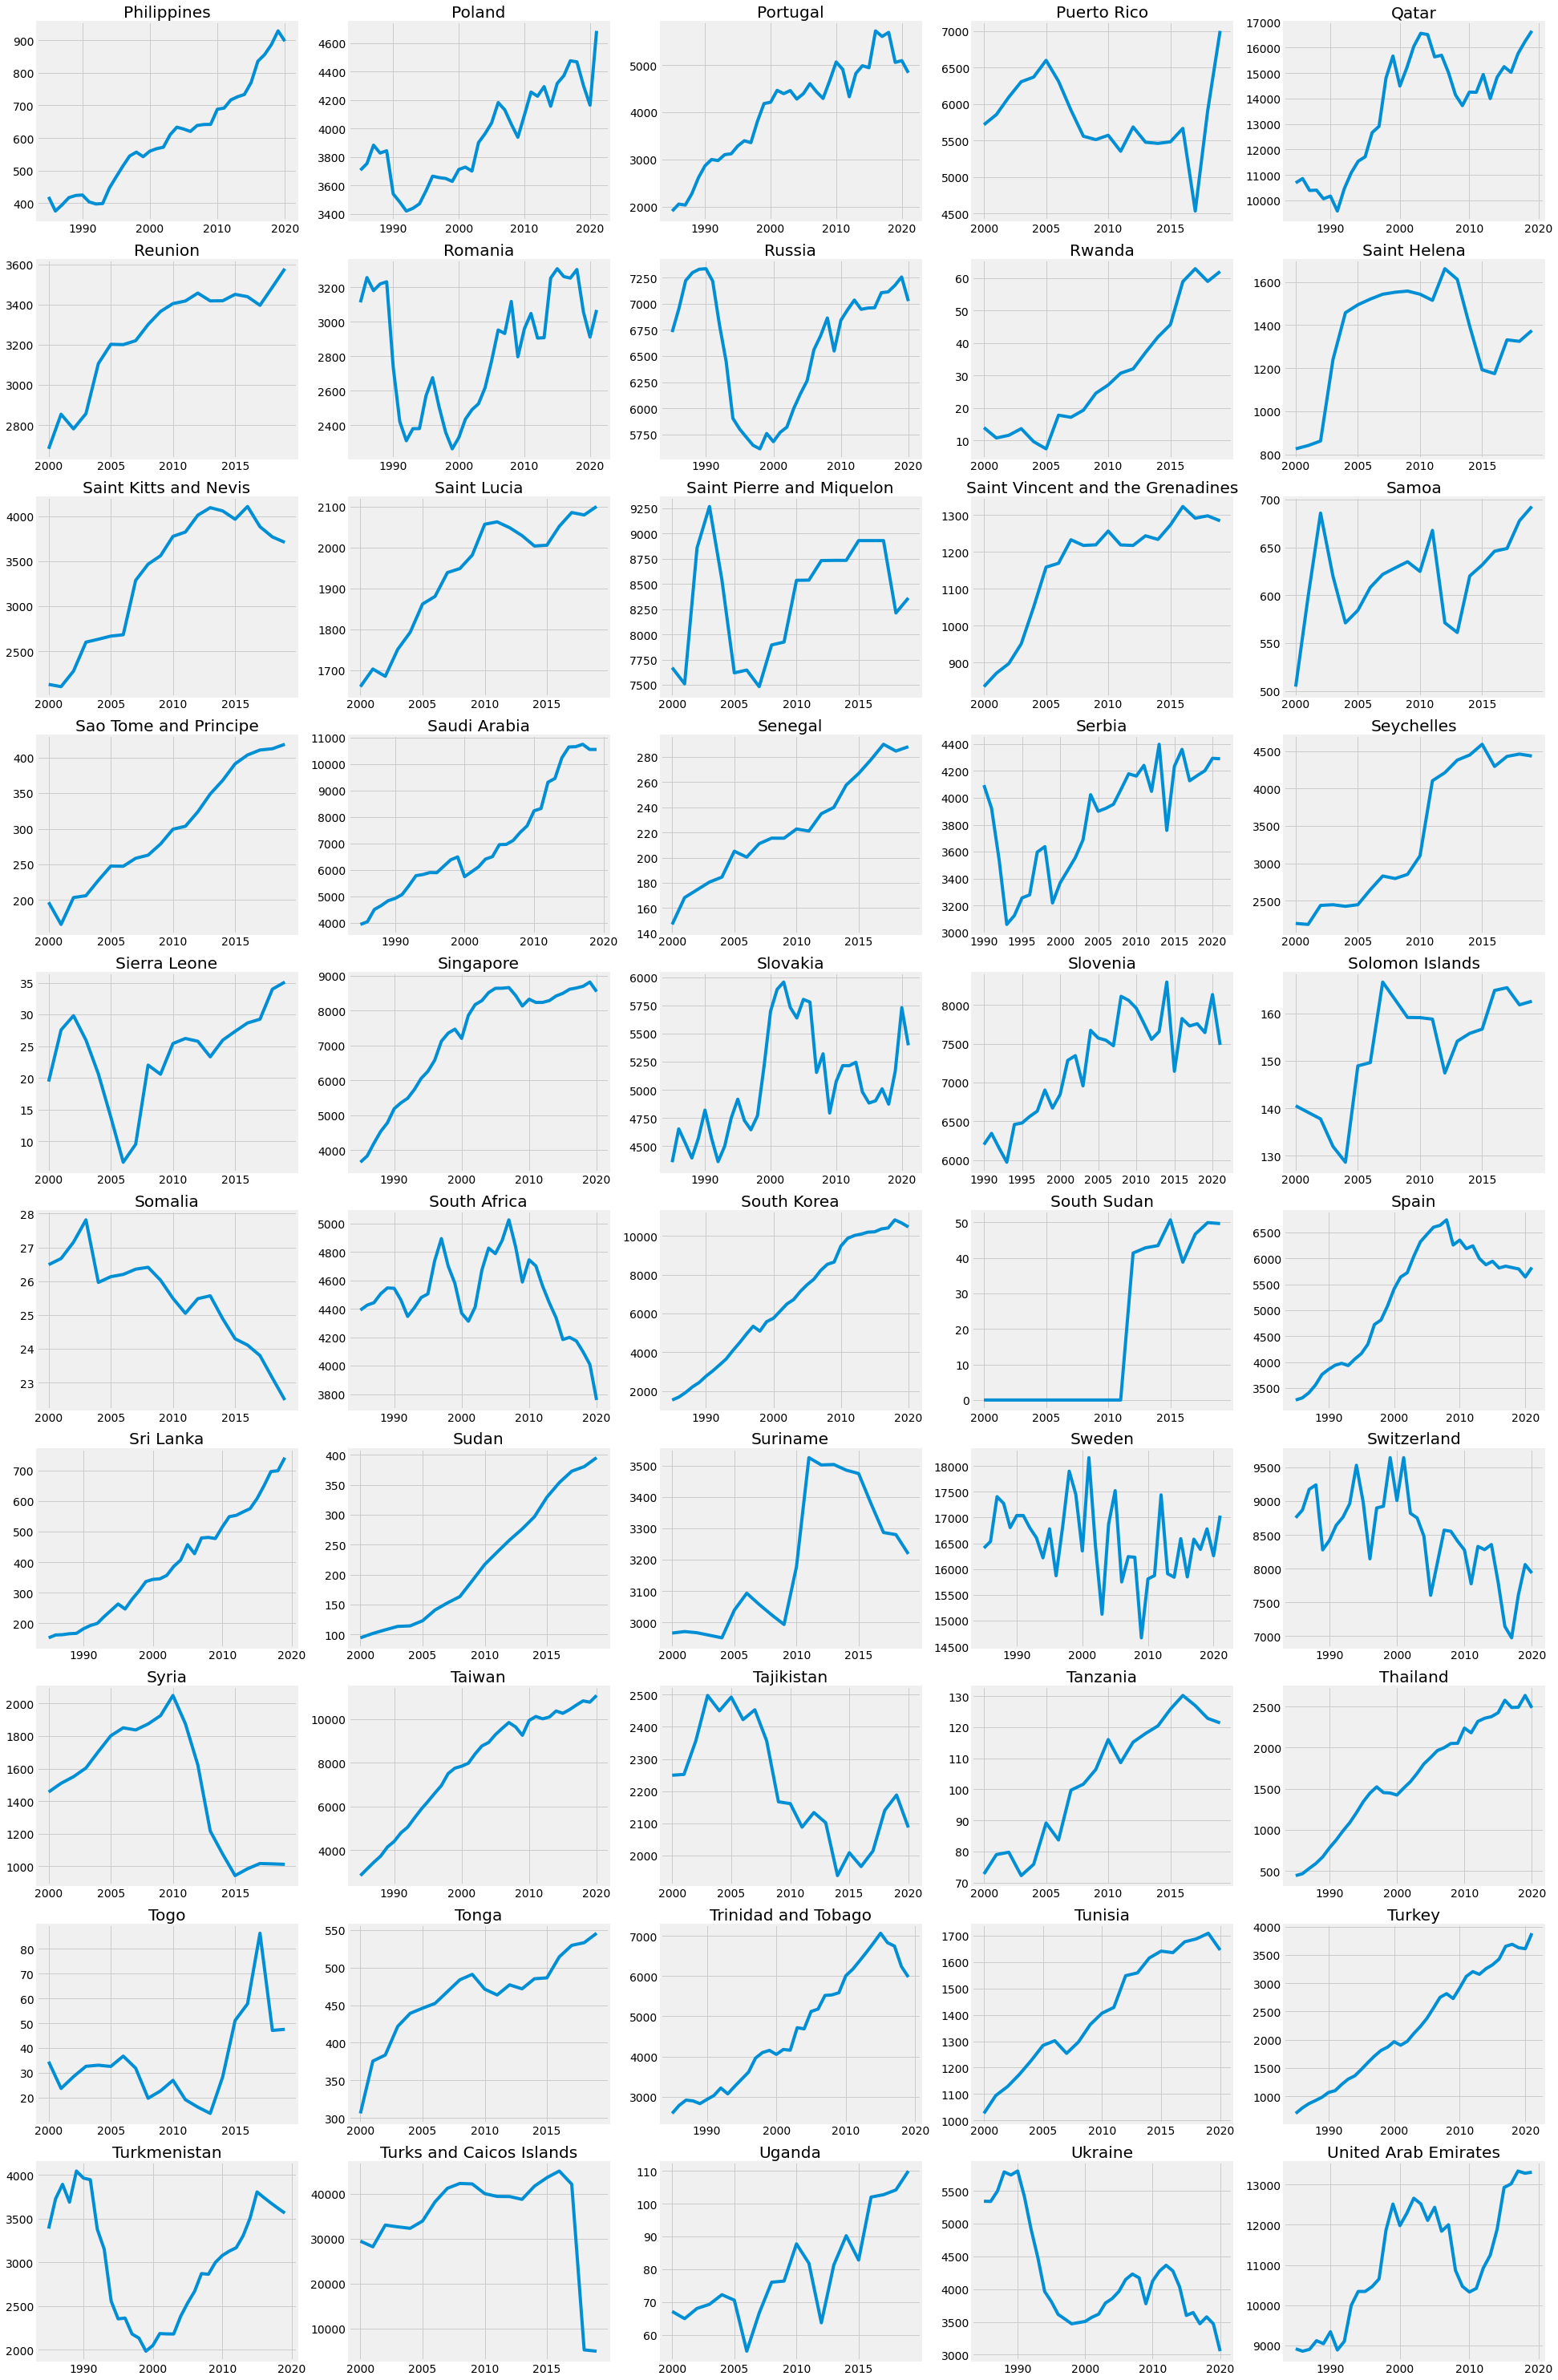

In [23]:
fig, ax= plt.subplots(10,5,figsize=(30,50),facecolor='white')
for i in range(0,10):
    data = fourth_50[i]
    for j in range(0,5):
        ax[i,j].plot(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']==data[j]],World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']==data[j]])
        ax[i,j].set_title(data[j])

In [24]:
len(World_Per_capita_electricity_consumption['Entity'].unique()[200:])

13

In [25]:
aaaaa=[]
bbbbb=[]
fifth_10=[aaaaa,bbbbb]
inc =0
for i in World_Per_capita_electricity_consumption['Entity'].unique()[200:210]:
    if len(fifth_10[inc])<5:
        fifth_10[inc].append(i)
    else:
        inc = inc+1
        fifth_10[inc].append(i)

In [26]:
World_Per_capita_electricity_consumption['Entity'].unique()[200:210]

array(['United Kingdom', 'United States', 'United States Virgin Islands',
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Western Sahara', 'World'], dtype=object)

In [27]:
World_Per_capita_electricity_consumption['Entity'].unique()[210:]

array(['Yemen', 'Zambia', 'Zimbabwe'], dtype=object)

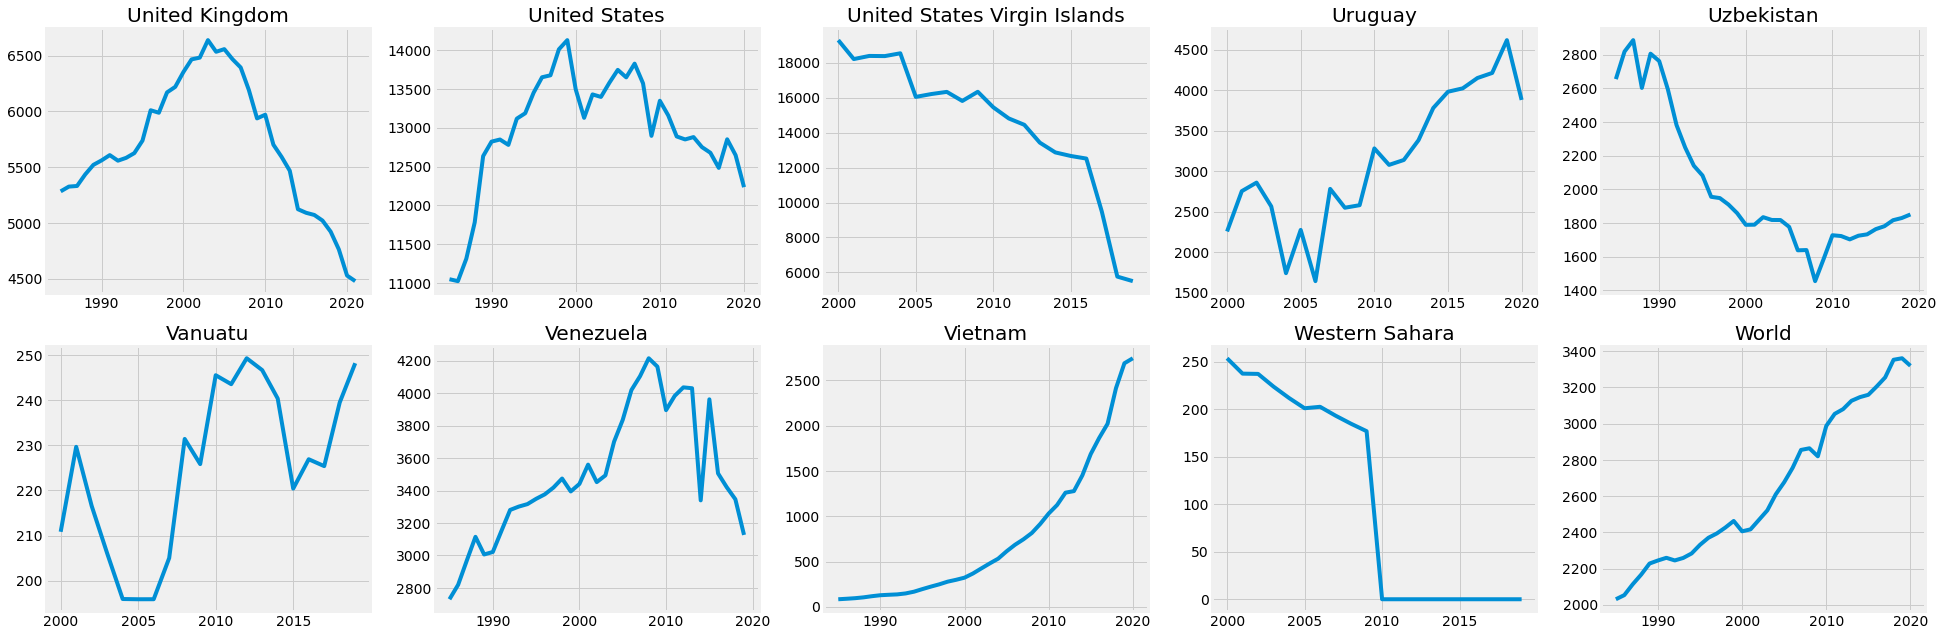

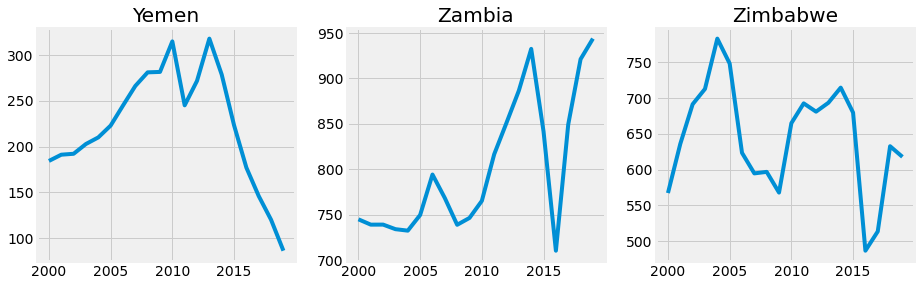

In [28]:
fig, ax= plt.subplots(2,5,figsize=(30,10),facecolor='white')
for i in range(0,2):
    data = fifth_10[i]
    for j in range(0,5):
        ax[i,j].plot(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']==data[j]],World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']==data[j]])
        ax[i,j].set_title(data[j])

fig, ax= plt.subplots(1,3,figsize=(14,4),facecolor='white')
last_3=[]
for i in World_Per_capita_electricity_consumption['Entity'].unique()[210:]:
    last_3.append(i)
for j in range(0,3):
    ax[j].plot(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']==last_3[j]],World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']==last_3[j]])
    ax[j].set_title(last_3[j])

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2b2b2b;font-size:120%;
            font-family:fantasy;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.4 | Predictions for few countries</b></p>
</div>
<ul>
    <li style="font-size:15px">We are going to <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>predict</b></mark> the per capita electricity consumpation for some countries</li>
    <li style="font-size:15px">For this predictions LinearRegression from <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>sklearn</b></mark> is used. It does not contains huge data so, it is not necessary to import additional algorithm from sklearn. Eg:train_test_split, bagging, etc...</li>
    <li style="font-size:15px">Let us <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>predict</b></mark> three countries listed below.
        <ul><li>India</li><li>Pakistan</li><li>China</li></ul>
    </li>
</ul>

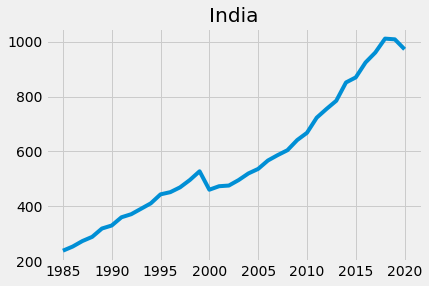

In [29]:
# INDIA

plt.plot(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']=='India'],World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']=="India"])
plt.title("India")
plt.show()

In [30]:
x=pd.DataFrame(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']=='India'])
y=pd.DataFrame(World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']=="India"])

In [31]:
model_i=LinearRegression()
model_i.fit(x,y)

LinearRegression()

In [32]:
print("Coefficient: ",model_i.coef_)
print("intercept: ",model_i.intercept_)
pre = model_i.predict(x)

Coefficient:  [[21.11990232]]
intercept:  [-41723.123139]


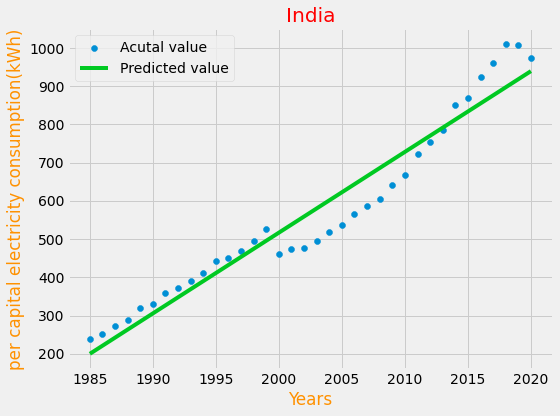

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,label='Acutal value')
plt.plot(x,pre,color='#00c922',label='Predicted value')
plt.legend()
plt.title("India",color='r')
plt.xlabel("Years",color='#ff9100')
plt.ylabel("per capital electricity consumption(kWh)",color='#ff9100')
plt.tight_layout()
plt.show()

In [34]:
# LET US PREDICT FOR THE YEAR 2021
years=[2021,2022,2023,2024,2025]
for i in years:
   print(model_i.predict([[i]]))

[[960.19944286]]
[[981.31934517]]
[[1002.43924749]]
[[1023.55914981]]
[[1044.67905212]]


In [35]:
print("By function: ",mean_squared_error(y,model_i.predict(x)))

# MANUAL CALCULATION
a=(pd.DataFrame(y['Per capita electricity (kWh)'])-pre)**2
b=sum(a['Per capita electricity (kWh)'])
print("Manual calculation: ",b/len(a))

By function:  3107.0183018244293
Manual calculation:  3107.0183018244293


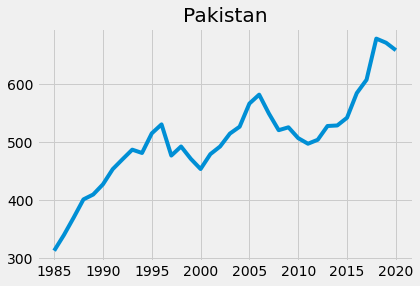

In [36]:
# PAKISTAN

plt.plot(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']=='Pakistan'],World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']=="Pakistan"])
plt.title("Pakistan")
plt.show()

In [37]:
x_p=pd.DataFrame(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']=='Pakistan'])
y_p=pd.DataFrame(World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']=="Pakistan"])

model_p = LinearRegression()
model_p.fit(x_p,y_p)
print("Coefficient: ",model_p.coef_)
print("intercept: ",model_p.intercept_)
pre = model_p.predict(x_p)

Coefficient:  [[6.69629717]]
intercept:  [-12905.05799678]


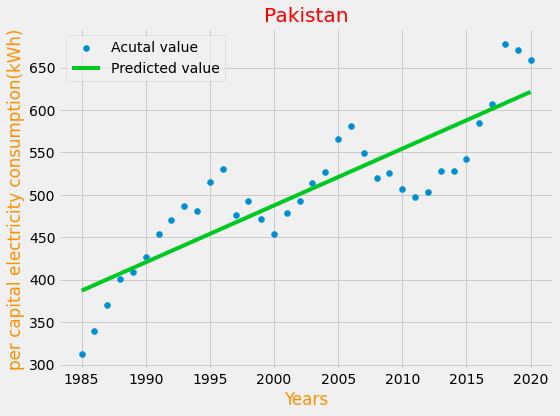

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x_p,y_p,label='Acutal value')
plt.plot(x_p,pre,color='#00c922',label='Predicted value')
plt.legend()
plt.title("Pakistan",color='r')
plt.xlabel("Years",color='#ff9100')
plt.ylabel("per capital electricity consumption(kWh)",color='#ff9100')
plt.tight_layout()
plt.show()

In [39]:
mean_squared_error(y_p,model_p.predict(x_p))

1635.691923213005

In [40]:
for i in years:
   print(model_p.predict([[i]]))

[[628.15858095]]
[[634.85487812]]
[[641.55117529]]
[[648.24747246]]
[[654.94376963]]


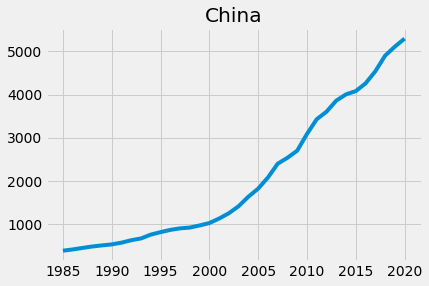

In [41]:
# CHINA

plt.plot(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']=='China'],World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']=="China"])
plt.title("China")
plt.show()

In [42]:
x_c=pd.DataFrame(World_Per_capita_electricity_consumption['Year'][World_Per_capita_electricity_consumption['Entity']=='China'])
y_c=pd.DataFrame(World_Per_capita_electricity_consumption['Per capita electricity (kWh)'][World_Per_capita_electricity_consumption['Entity']=="China"])

model_c = LinearRegression()
model_c.fit(x_c,y_c)
print("Coefficient: ",model_c.coef_)
print("intercept: ",model_c.intercept_)
pre = model_c.predict(x_c)

Coefficient:  [[144.66853256]]
intercept:  [-287644.17206478]


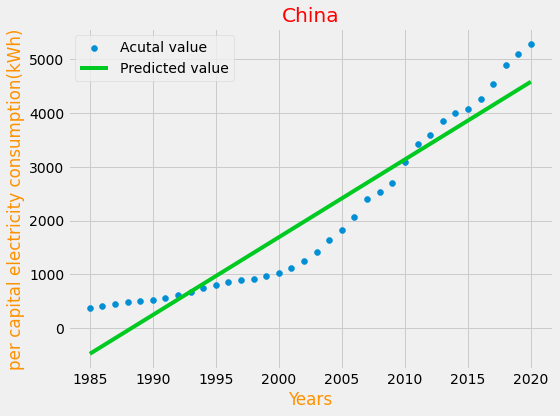

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(x_c,y_c,label='Acutal value')
plt.plot(x_c,pre,color='#00c922',label='Predicted value')
plt.legend()
plt.title("China",color='r')
plt.xlabel("Years",color='#ff9100')
plt.ylabel("per capital electricity consumption(kWh)",color='#ff9100')
plt.tight_layout()
plt.show()

In [44]:
for i in years:
   print(model_c.predict([[i]]))

[[4730.93224127]]
[[4875.60077383]]
[[5020.26930639]]
[[5164.93783895]]
[[5309.60637151]]


<div style="color:white;display:fill;border-radius:8px;
            background-color:#2b2b2b;font-size:120%;
            font-family:fantasy;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.5 | The conclusion</b></p>
</div>
<ul>
    <li>The below tabel contains the <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>predictions of</b></mark> per captia electricity consumption(kWh) using <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>Linear Regression</b></mark></li>
    <li>The countries included are <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>India</b></mark>, <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>Pakistan</b></mark>, and <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>China</b></mark></li>
    <li>Regression analysis is used when you want to predict a <mark style="background-color:#035afc;color:white;border-radius:4px;"><b>continuous dependent variable</b></mark> from a number of independent variables.</li>
 </ul>

<table style="margin-left:350px;">
  <tr>
    <th style="background-color:#035afc;
               color:white;
               border-radius:8px"><b>Year</b></th>
    <th style="background-color:#035afc;
               color:white;
               border-radius:8px"><b>India</b></th>
      <th style="background-color:#035afc;
               color:white;
                 border-radius:8px"><b>Pakistan</b></th>
      <th style="background-color:#035afc;
               color:white;
                 border-radius:8px"><b>China</b></th>
  </tr>
  <tr>
    <td style="background-color:#035afc;
               color:white;
               border-radius:8px"><b>2021</b></td>
    <td>960.1994</td>
    <td>62831585</td>
    <td>4730.9322</td>
  </tr>
  <tr>
    <td style="background-color:#035afc;
               color:white;
               border-radius:8px"><b>2022</b></td>
    <td>981.31934</td>
    <td>634.8548</td>
    <td>4875.6007</td>
  </tr>
  <tr>
    <td style="background-color:#035afc;
               color:white;
               border-radius:8px"><b>2023</b></td>
    <td>1002.4392</td>
    <td>641.5511</td>
    <td>5020.2693</td>
  </tr>
  <tr>
    <td style="background-color:#035afc;
               color:white;
               border-radius:8px"><b>2024</b></td>
    <td>1023.5591</td>
    <td>648.2474</td>
    <td>5164.9378</td>
  </tr>
  <tr>
    <td style="background-color:#035afc;
               color:white;
               border-radius:8px"><b>2025</b></td>
    <td>1044.6790</td>
    <td>654.9437</td>
    <td>5309.6063</td>
  </tr>
</table>


<div style="display:fill;
            border-radius:15px;
            background-color:#035afc;
            font-size:210%;
            font-family:cursive;
            letter-spacing:0.5px;
            padding:10px;
            color:white;
            border-style: solid;
            border-color: black;
            text-align:center;">
<b>
The End</b>
</div>